In [4]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")

In [6]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
df1.shape

(13320, 9)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [9]:
df1.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [10]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [11]:
#We remove duplicate rows from DataFrame
df1.drop_duplicates(inplace = True)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12791 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12791 non-null  object 
 1   availability  12791 non-null  object 
 2   location      12790 non-null  object 
 3   size          12775 non-null  object 
 4   society       7463 non-null   object 
 5   total_sqft    12791 non-null  object 
 6   bath          12718 non-null  float64
 7   balcony       12186 non-null  float64
 8   price         12791 non-null  float64
dtypes: float64(3), object(6)
memory usage: 999.3+ KB


In [13]:
#Now we deal with null values

In [14]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

In [15]:
#As society has a lot of null values and it mostly doesnot contribute to target we are dropping it
df1.drop('society', axis = 1, inplace = True)

In [16]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price'],
      dtype='object')

In [17]:
df1['bath'].value_counts()

bath
2.0     6546
3.0     3180
4.0     1198
1.0      762
5.0      520
6.0      271
7.0      102
8.0       64
9.0       42
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: count, dtype: int64

In [18]:
bath_mean = df1.bath.mean()
print(bath_mean)

2.708601981443623


In [19]:
bath_mean = round(bath_mean)
print(bath_mean)

3


In [20]:
#We replace the null bath values with mean

df1['bath'].fillna(bath_mean, inplace = True)

In [21]:
df1.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath              0
balcony         605
price             0
dtype: int64

In [22]:
df1['balcony'].value_counts()

balcony
2.0    4846
1.0    4700
3.0    1630
0.0    1010
Name: count, dtype: int64

In [23]:
bal_mean = round(df1.balcony.mean())
bal_mean

2

In [24]:
#We replace the null balcony values with mean

df1['balcony'].fillna(bal_mean, inplace = True)

In [25]:
df1.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64

In [26]:
#As size and location null values are less than 5% of data, we can remove these rows

df1.dropna(inplace = True)

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12774 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12774 non-null  object 
 1   availability  12774 non-null  object 
 2   location      12774 non-null  object 
 3   size          12774 non-null  object 
 4   total_sqft    12774 non-null  object 
 5   bath          12774 non-null  float64
 6   balcony       12774 non-null  float64
 7   price         12774 non-null  float64
dtypes: float64(3), object(5)
memory usage: 898.2+ KB


In [28]:
df1.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

Thus we have dealt with all null values

In [29]:
df1['area_type'].value_counts()

area_type
Super built-up  Area    8316
Built-up  Area          2398
Plot  Area              1973
Carpet  Area              87
Name: count, dtype: int64

In [30]:
df1['availability'].value_counts()

availability
Ready To Move    10171
18-May             292
18-Dec             284
18-Apr             269
18-Aug             187
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 80, dtype: int64

In [31]:
df1['size'].value_counts()

size
2 BHK         4931
3 BHK         4119
4 Bedroom      824
4 BHK          574
3 Bedroom      535
1 BHK          521
2 Bedroom      314
5 Bedroom      291
6 Bedroom      191
1 Bedroom      104
8 Bedroom       84
7 Bedroom       82
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [32]:
#Here we can do some changes as bedroom and BHK mostly mean the same

df1['size'] = df1['size'].str.replace('4 Bedroom','4 BHK')

In [33]:
#Created a loop to convert all bedroom as BHK
for i in range(1,50):
    df1['size'] = df1['size'].str.replace('{} Bedroom'.format(i),'{} BHK'.format(i))
    

In [34]:
df1['size'].value_counts()

size
2 BHK     5245
3 BHK     4654
4 BHK     1398
1 BHK      625
5 BHK      350
6 BHK      221
7 BHK       99
8 BHK       89
9 BHK       54
10 BHK      14
1 RK        13
11 BHK       4
27 BHK       1
19 BHK       1
16 BHK       1
43 BHK       1
14 BHK       1
12 BHK       1
13 BHK       1
18 BHK       1
Name: count, dtype: int64

In [35]:
df1.dtypes

area_type        object
availability     object
location         object
size             object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [36]:
df1['total_sqft'].value_counts()

total_sqft
1200           808
1100           210
1500           201
2400           195
600            178
              ... 
2005             1
605 - 624        1
4260 - 4408      1
2582             1
4689             1
Name: count, Length: 2110, dtype: int64

In [37]:
#Function to covert non-float sqft values to float

def sqft_to_num(st):
    num = st.split('-')
    if len(num)==2:
        return (float(num[1])+float(num[0]))/2
    try:
        return float(st)
    except:
        return None

In [38]:
df2 = df1.copy()

df2['total_sqft'] = df2['total_sqft'].apply(sqft_to_num)

In [39]:
df2['total_sqft'].value_counts()

total_sqft
1200.0    808
1100.0    210
1500.0    201
2400.0    195
600.0     178
         ... 
4830.0      1
2383.0      1
3080.0      1
787.0       1
4689.0      1
Name: count, Length: 1996, dtype: int64

In [40]:
df2['total_sqft'].isnull().sum()

46

In [41]:
df2.isnull().sum()

area_type        0
availability     0
location         0
size             0
total_sqft      46
bath             0
balcony          0
price            0
dtype: int64

In [42]:
df2.dropna(inplace=True)

In [43]:
df2.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [44]:
df2.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


In [45]:
df2.drop('availability', axis=1, inplace=True)

In [46]:
df2.columns

Index(['area_type', 'location', 'size', 'total_sqft', 'bath', 'balcony',
       'price'],
      dtype='object')

In [47]:
df2.nunique()

area_type        4
location      1298
size            20
total_sqft    1996
bath            19
balcony          4
price         1982
dtype: int64

In [48]:
df2['size'].value_counts()

size
2 BHK     5235
3 BHK     4640
4 BHK     1393
1 BHK      616
5 BHK      346
6 BHK      220
7 BHK       99
8 BHK       88
9 BHK       52
10 BHK      14
1 RK        13
11 BHK       4
27 BHK       1
19 BHK       1
16 BHK       1
43 BHK       1
14 BHK       1
12 BHK       1
13 BHK       1
18 BHK       1
Name: count, dtype: int64

In [49]:
df2['bath'].value_counts()

bath
2.0     6531
3.0     3225
4.0     1194
1.0      755
5.0      517
6.0      267
7.0      102
8.0       64
9.0       40
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: count, dtype: int64

In [50]:
#WE applied the logic that 1BHK will have 1 bath and 2BHK will have 2 bath

df2.loc[df2['size'] == '1 BHK', 'bath'] = 1
df2.loc[df2['size'] == '1 RK', 'bath'] = 1
df2.loc[df2['size'] == '2 BHK', 'bath'] = 2



In [51]:
df2['bath'].value_counts()

bath
2.0     6727
3.0     3156
4.0     1190
1.0      632
5.0      517
6.0      267
7.0      102
8.0       64
9.0       40
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: count, dtype: int64

In [52]:
#WE applied the logic that 1BHK will have 1 bath and balcony only

df2.loc[df2['size'] == '1 BHK', 'balcony'] = 1
df2.loc[df2['size'] == '1 RK', 'balcony'] = 1

In [53]:
df2.loc[df2['size'] == '1 BHK', 'bath'] = 1
df2.loc[df2['size'] == '1 RK', 'bath'] = 1

In [54]:
df2['balcony'].value_counts()

balcony
2.0    5375
1.0    4908
3.0    1625
0.0     820
Name: count, dtype: int64

In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12728 entries, 0 to 13318
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12728 non-null  object 
 1   location    12728 non-null  object 
 2   size        12728 non-null  object 
 3   total_sqft  12728 non-null  float64
 4   bath        12728 non-null  float64
 5   balcony     12728 non-null  float64
 6   price       12728 non-null  float64
dtypes: float64(4), object(3)
memory usage: 795.5+ KB


In [56]:

df2.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 BHK,2600.0,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


In [57]:
df2['bhk'] = df2['size'].str[0]

In [58]:
df2['bhk'] = df2['bhk'].astype(int)

In [59]:
df2.drop('size',axis=1,inplace=True)

In [60]:
df2.head()

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2


In [61]:
location_stats = df2['location'].value_counts(ascending=False)
location_stats

location
Whitefield           520
Sarjapur  Road       377
Electronic City      287
Kanakpura Road       247
Thanisandra          228
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: count, Length: 1298, dtype: int64

In [62]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Nagappa Reddy Layout    10
BEML Layout             10
Narayanapura            10
Nagadevanahalli         10
Kalkere                 10
                        ..
Vidyapeeta               1
Maruthi Extension        1
Okalipura                1
Old Town                 1
Abshot Layout            1
Name: count, Length: 1066, dtype: int64

In [63]:
df2.location = df2.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df2.location.unique())

233

We now remove the outliers

In [64]:
def remo_out(df):
    df1 = df.select_dtypes(include=np.number)
    col = df1.columns
    for ele in col:
        q1 = df1[ele].quantile(0.25)
        q3 = df1[ele].quantile(0.75)
        iqr = q3-q1
        low = q1 - 1.5*iqr
        high = q3 + 1.5*iqr
        
        df = df[(df[ele]>low) & (df[ele]<high)]
    
    return df
        

In [65]:
df3 = remo_out(df2)

In [66]:
df3

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2
5,Super built-up Area,Whitefield,1170.0,2.0,1.0,38.00,2
...,...,...,...,...,...,...,...
13309,Super built-up Area,Yeshwanthpur,1675.0,3.0,2.0,92.13,3
13310,Super built-up Area,Rachenahalli,1050.0,2.0,2.0,52.71,2
13312,Super built-up Area,Bellandur,1262.0,2.0,2.0,47.00,2
13314,Super built-up Area,Green Glen Layout,1715.0,3.0,3.0,112.00,3


In [67]:
df3.reset_index(inplace=True,drop=True)

In [68]:
df3

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3
2,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
3,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2
4,Super built-up Area,Whitefield,1170.0,2.0,1.0,38.00,2
...,...,...,...,...,...,...,...
10547,Super built-up Area,Yeshwanthpur,1675.0,3.0,2.0,92.13,3
10548,Super built-up Area,Rachenahalli,1050.0,2.0,2.0,52.71,2
10549,Super built-up Area,Bellandur,1262.0,2.0,2.0,47.00,2
10550,Super built-up Area,Green Glen Layout,1715.0,3.0,3.0,112.00,3


In [69]:
from dython.nominal import associations

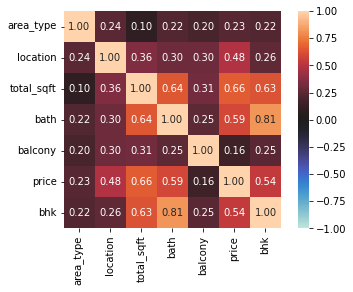

{'corr':             area_type  location  total_sqft      bath   balcony     price  \
 area_type    1.000000  0.244474    0.101547  0.219333  0.195292  0.234596   
 location     0.244474  1.000000    0.357828  0.303449  0.303425  0.477701   
 total_sqft   0.101547  0.357828    1.000000  0.640633  0.312809  0.663921   
 bath         0.219333  0.303449    0.640633  1.000000  0.253247  0.590801   
 balcony      0.195292  0.303425    0.312809  0.253247  1.000000  0.159199   
 price        0.234596  0.477701    0.663921  0.590801  0.159199  1.000000   
 bhk          0.223216  0.262839    0.631230  0.814190  0.246152  0.537717   
 
                  bhk  
 area_type   0.223216  
 location    0.262839  
 total_sqft  0.631230  
 bath        0.814190  
 balcony     0.246152  
 price       0.537717  
 bhk         1.000000  ,
 'ax': <AxesSubplot: >}

In [70]:
associations(df3)

Here we can see that total_sqft, bhk and price are moderatrly correlated to price

In [71]:
import plotly.express as px

In [72]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [73]:
#Before the outlier removal
fig = px.histogram(df2, x='total_sqft', title='Total Sqft')
fig.show()

In [74]:
#After the outlier removal
fig = px.histogram(df3, x='total_sqft', title='Total Sqft')
fig.show()

In [75]:
fig = px.histogram(df3, x='bath', title='No. of baths')
fig.update_layout(bargap=0.2)
fig.show()

In [76]:
fig = px.histogram(df3, x='balcony', title='No. of balcony')
fig.update_layout(bargap=0.2)
fig.show()

In [77]:
fig = px.histogram(df3, x='bhk',y='price', title='Avg price by bhk', histfunc='avg')
fig.update_layout(bargap=0.2)
fig.show()

In [78]:
fig = px.box(df3, x='bhk',y='price')
fig.show()

In [75]:
fig = px.histogram(df3, x='bhk',y='total_sqft', title='Avg sqft by bhk', histfunc='avg')
fig.update_layout(bargap=0.2)
fig.show()

In [76]:
fig = px.box(df3, x='bhk',y='total_sqft')
fig.show()

In [ ]:
fig = px.scatter(df3, y='price',x='total_sqft', title='Price vs Area')
fig.show()

In [76]:
df3['area_type'].nunique()

4

In [77]:
df3

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3
2,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
3,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2
4,Super built-up Area,Whitefield,1170.0,2.0,1.0,38.00,2
...,...,...,...,...,...,...,...
10547,Super built-up Area,Yeshwanthpur,1675.0,3.0,2.0,92.13,3
10548,Super built-up Area,Rachenahalli,1050.0,2.0,2.0,52.71,2
10549,Super built-up Area,Bellandur,1262.0,2.0,2.0,47.00,2
10550,Super built-up Area,Green Glen Layout,1715.0,3.0,3.0,112.00,3


In [78]:
from sklearn.preprocessing import MinMaxScaler

def minmax_normalize_dataframe(df, target_variable):
    # Identify numeric columns excluding the target variable
    numeric_columns = df.select_dtypes(include=np.number).columns
    numeric_columns = numeric_columns.drop(target_variable)

    # Perform min-max normalization on numeric columns
    scaler = MinMaxScaler()
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

    return df


In [79]:
df4 = minmax_normalize_dataframe(df3,'price')
df4

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,0.347564,0.333333,0.333333,39.07,0.333333
1,Built-up Area,Uttarahalli,0.513152,0.333333,1.000000,62.00,0.666667
2,Super built-up Area,Lingadheeranahalli,0.548081,0.666667,0.333333,95.00,0.666667
3,Super built-up Area,Kothanur,0.409659,0.333333,0.333333,51.00,0.333333
4,Super built-up Area,Whitefield,0.396723,0.333333,0.333333,38.00,0.333333
...,...,...,...,...,...,...,...
10547,Super built-up Area,Yeshwanthpur,0.614489,0.666667,0.666667,92.13,0.666667
10548,Super built-up Area,Rachenahalli,0.344976,0.333333,0.666667,52.71,0.333333
10549,Super built-up Area,Bellandur,0.436395,0.333333,0.666667,47.00,0.333333
10550,Super built-up Area,Green Glen Layout,0.631738,0.666667,1.000000,112.00,0.666667


In [80]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10552 entries, 0 to 10551
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   10552 non-null  object 
 1   location    10552 non-null  object 
 2   total_sqft  10552 non-null  float64
 3   bath        10552 non-null  float64
 4   balcony     10552 non-null  float64
 5   price       10552 non-null  float64
 6   bhk         10552 non-null  float64
dtypes: float64(5), object(2)
memory usage: 577.2+ KB


Now we will normalize the data

In [81]:
df_n = df4.select_dtypes(include=np.number)
df_c = df4.select_dtypes(exclude=np.number)
y = df4['price']
df_n = df_n.drop('price',axis=1)


In [82]:
df_n

,total_sqft,bath,balcony,bhk
0,0.347564,0.333333,0.333333,0.333333
1,0.513152,0.333333,1.000000,0.666667
2,0.548081,0.666667,0.333333,0.666667
3,0.409659,0.333333,0.333333,0.333333
4,0.396723,0.333333,0.333333,0.333333
...,...,...,...,...
10547,0.614489,0.666667,0.666667,0.666667
10548,0.344976,0.333333,0.666667,0.333333
10549,0.436395,0.333333,0.666667,0.333333
10550,0.631738,0.666667,1.000000,0.666667


In [83]:
df_c = pd.get_dummies(df_c, drop_first=True, dtype=float)

In [84]:
df_c

,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10547,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10548,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10549,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10550,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
X = pd.concat([df_c,df_n],axis=1)
X

,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,...,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other,total_sqft,bath,balcony,bhk
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.347564,0.333333,0.333333,0.333333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.513152,0.333333,1.000000,0.666667
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.548081,0.666667,0.333333,0.666667
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.409659,0.333333,0.333333,0.333333
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.396723,0.333333,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10547,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.614489,0.666667,0.666667,0.666667
10548,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.344976,0.333333,0.666667,0.333333
10549,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.436395,0.333333,0.666667,0.333333
10550,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.631738,0.666667,1.000000,0.666667


In [86]:
y

0         39.07
1         62.00
2         95.00
3         51.00
4         38.00
          ...  
10547     92.13
10548     52.71
10549     47.00
10550    112.00
10551     60.00
Name: price, Length: 10552, dtype: float64

In [125]:

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor


# Create an instance of the decision tree regressor
estimator = DecisionTreeRegressor()

# Create an instance of the RFE class
rfe = RFE(estimator=estimator, n_features_to_select=80)

# Fit the RFE model on the data
rfe.fit(X, y)

# Obtain the selected features and their rankings
selected_features = rfe.transform(X)
feature_ranking = rfe.ranking_
selected_feature_mask = rfe.support_

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_mask]


In [126]:
selected_feature_names

Index(['area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area', 'location_1st Block Jayanagar',
       'location_1st Phase JP Nagar', 'location_6th Phase JP Nagar',
       'location_7th Phase JP Nagar', 'location_Akshaya Nagar',
       'location_Ambalipura', 'location_Anekal', 'location_BTM 2nd Stage',
       'location_Banashankari', 'location_Banashankari Stage II',
       'location_Banashankari Stage III', 'location_Bannerghatta Road',
       'location_Basavangudi', 'location_Basaveshwara Nagar', 'location_Begur',
       'location_Begur Road', 'location_Bellandur', 'location_Binny Pete',
       'location_CV Raman Nagar', 'location_Chamrajpet', 'location_Chandapura',
       'location_Cooke Town', 'location_Cox Town', 'location_Domlur',
       'location_Electronic City', 'location_Electronic City Phase II',
       'location_Frazer Town', 'location_HAL 2nd Stage', 'location_HSR Layout',
       'location_Haralur Road', 'location_Hebbal', 'location_Hebbal

In [127]:
X_5 = pd.DataFrame(selected_features, columns = selected_feature_names)

In [128]:
X_5

,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,location_Akshaya Nagar,location_Ambalipura,location_Anekal,...,location_Uttarahalli,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yeshwanthpur,location_other,total_sqft,bath,balcony,bhk
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.347564,0.333333,0.333333,0.333333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.513152,0.333333,1.000000,0.666667
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.548081,0.666667,0.333333,0.666667
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.409659,0.333333,0.333333,0.333333
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.396723,0.333333,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10547,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.614489,0.666667,0.666667,0.666667
10548,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.344976,0.333333,0.666667,0.333333
10549,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.436395,0.333333,0.666667,0.333333
10550,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.631738,0.666667,1.000000,0.666667


In [176]:
X

,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,...,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other,total_sqft,bath,balcony,bhk
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.347564,0.333333,0.333333,0.333333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.513152,0.333333,1.000000,0.666667
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.548081,0.666667,0.333333,0.666667
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.409659,0.333333,0.333333,0.333333
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.396723,0.333333,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10547,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.614489,0.666667,0.666667,0.666667
10548,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.344976,0.333333,0.666667,0.333333
10549,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.436395,0.333333,0.666667,0.333333
10550,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.631738,0.666667,1.000000,0.666667


In [177]:
y

0         39.07
1         62.00
2         95.00
3         51.00
4         38.00
          ...  
10547     92.13
10548     52.71
10549     47.00
10550    112.00
10551     60.00
Name: price, Length: 10552, dtype: float64

# Linear Regression

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=23)

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [155]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 510.9168724271428


In [158]:
r2 = r2_score(y_test, y_pred)

# Print the R-squared value
print("R-squared:", r2)

R-squared: 0.6547798554188058


# KNN Regressor

In [178]:
from sklearn.neighbors import KNeighborsRegressor

In [179]:


# Split the data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Create an instance of the KNN regressor
knn = KNeighborsRegressor()

# Fit the KNN regressor on the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Evaluate the performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 652.033944101213


In [180]:
r2 = r2_score(y_test, y_pred)

# Print the R-squared value
print("R-squared:", r2)

R-squared: 0.5594288139572727


# Decision Tree

In [132]:
from sklearn.tree import DecisionTreeRegressor


model=DecisionTreeRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 763.730194882184


In [133]:
r2 = r2_score(y_test, y_pred)

# Print the R-squared value
print("R-squared:", r2)

R-squared: 0.4839570534327018


# Random Forests

In [134]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 529.8494067231551


In [135]:
r2 = r2_score(y_test, y_pred)

# Print the R-squared value
print("R-squared:", r2)

R-squared: 0.6419873786389558


# Support Vector Machine (SVM) regressor

In [136]:
from sklearn.svm import SVR

model=SVR()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 696.5930687188713


In [137]:
r2 = r2_score(y_test, y_pred)

# Print the R-squared value
print("R-squared:", r2)

R-squared: 0.5293207704122574


# Gradient Boosting Machine (GBM)

In [163]:
from sklearn.ensemble import GradientBoostingRegressor


model = GradientBoostingRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 533.3715730516246


In [164]:
r2 = r2_score(y_test, y_pred)

# Print the R-squared value
print("R-squared:", r2)

R-squared: 0.6396074948755229


# XGBoost

In [174]:
import xgboost as xgb

model = xgb.XGBRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 456.4403447231279


In [175]:
r2 = r2_score(y_test, y_pred)

# Print the R-squared value
print("R-squared:", r2)

R-squared: 0.6915889642683932


# Light GBM

In [168]:
import lightgbm as lgb

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Set the hyperparameters
params = {
    'objective': 'regression',
    'metric': 'mse'
}

# Train the LightGBM model
lgb_model = lgb.train(params, train_data)

# Make predictions
y_pred = lgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 453
[LightGBM] [Info] Number of data points in the train set: 7914, number of used features: 97
[LightGBM] [Info] Start training from score 74.448119
Mean Squared Error (MSE): 504.2811661147888


In [169]:
r2 = r2_score(y_test, y_pred)

# Print the R-squared value
print("R-squared:", r2)

R-squared: 0.6592635192321904


# We see that the best performance is of XGBoost with r2 score of 0.6915 and Mean Squared Error: 456.44